# Data Preprocessing

The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.

### 1.Data Exploration and Cleaning
### 2.Data Analysis
### 3.Data Encoding
### 4.Feature Scaling

In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis

In [479]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### 1.Data Exploration and Cleaning

In [420]:
df=pd.read_csv('Employee.csv')
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


The Dataset contains 148 rows and 6 columns. It contains employee information such as age,salary etc from various companies across cities in India.

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


The info() function provides information regarding the count of non null values in the datset and also the datatype of values in each column. Here we have 3 categorical and 3 numerical columns.

In [422]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [423]:
df['Age'].unique()

array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17.,  0., 54.])

The unique() function listed the unique values present in age column and it is observed that there is a value called 0 which is incorrect.

In [424]:
df.loc[df['Age'] == 0, 'Age'] = np.nan

In [425]:
df['Age'].unique()

array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17., 54.])

The value 0 is replaced with 'nan' which wil now be treated as null value.

In [426]:
df['Gender'].unique()

array([0, 1], dtype=int64)

The unique() function listed the unique values in the gender column.

In [427]:
df['Gender'].replace({0: 'M', 1: 'F'}, inplace=True)

In [428]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

The values 0,1 is replaced to M,F(Male, Female) respectively hence the column becomes categorical column.

In [429]:
df.isnull().all(axis=1).sum()

0

Checked for completely empty rows and found none.

In [430]:
df.duplicated().sum()

4

Checked for duplicate rows and found 4 duplicate rows.

In [431]:
df.drop_duplicates(inplace=True)
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,M
1,Infosys,30.0,NaN,Mumbai,India,M
2,TCS,35.0,2300.0,Calcutta,India,M
3,Infosys,40.0,3000.0,Delhi,India,M
4,TCS,23.0,4000.0,Mumbai,India,M
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,M
143,TCS,33.0,9024.0,Calcutta,India,F
145,Infosys,44.0,4034.0,Delhi,India,F
146,TCS,33.0,5034.0,Mumbai,India,F


drop_duplicates() function keeps one row(first) and deletes the rest of the duplicates.

In [432]:
df.Company.unique()

array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

Listed the unique values present in the Company column and found out there is a repetion of company names. For example, CTS is same as Cognizant

In [433]:
df['Company'].replace({'Tata Consultancy Services': 'TCS', 'Infosys Pvt Lmt': 'Infosys','Congnizant': 'CTS'}, inplace=True)
df.Company.unique()

array(['TCS', 'Infosys', 'CTS', nan], dtype=object)

Identified the similarites between the values and removed the repetitions by changing it to a single name hence reducing complexity.

In [434]:
df.Salary.unique()

array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
       1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
       8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
       9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
       3454., 5654., 5009., 5098., 3033.])

Listed the unique values in salary column

In [435]:
df.Place.unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

Listed the unique values in place column.

In [436]:
df.replace('Podicherry','Pondicherry',inplace=True)
df.Place.unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Pondicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

Replaced 'Podicherry' with'Pondicherry' as the spelling was incorrect.

In [437]:
df.Country.unique()

array(['India'], dtype=object)

In [438]:
df.drop(columns='Country', inplace=True)
df

,Company,Age,Salary,Place,Gender
0,TCS,20.0,NaN,Chennai,M
1,Infosys,30.0,NaN,Mumbai,M
2,TCS,35.0,2300.0,Calcutta,M
3,Infosys,40.0,3000.0,Delhi,M
4,TCS,23.0,4000.0,Mumbai,M
...,...,...,...,...,...
142,Infosys,22.0,8202.0,Mumbai,M
143,TCS,33.0,9024.0,Calcutta,F
145,Infosys,44.0,4034.0,Delhi,F
146,TCS,33.0,5034.0,Mumbai,F


Listed the unique values in country column and it was found there is only 1 value in the entire column hence we can drop the column as it has no meaningful information. Resulting dataset is printed.

In [439]:
df1=df.copy()
df1

,Company,Age,Salary,Place,Gender
0,TCS,20.0,NaN,Chennai,M
1,Infosys,30.0,NaN,Mumbai,M
2,TCS,35.0,2300.0,Calcutta,M
3,Infosys,40.0,3000.0,Delhi,M
4,TCS,23.0,4000.0,Mumbai,M
...,...,...,...,...,...
142,Infosys,22.0,8202.0,Mumbai,M
143,TCS,33.0,9024.0,Calcutta,F
145,Infosys,44.0,4034.0,Delhi,F
146,TCS,33.0,5034.0,Mumbai,F


In [440]:
df1.describe(include='all')

,Company,Age,Salary,Place,Gender
count,136,121.000000,121.000000,130,144
unique,3,NaN,NaN,11,2
top,TCS,NaN,NaN,Mumbai,M
freq,54,NaN,NaN,34,112
mean,NaN,32.041322,5283.471074,NaN,NaN
std,NaN,8.989250,2585.373600,NaN,NaN
min,NaN,17.000000,1089.000000,NaN,NaN
25%,NaN,23.000000,3030.000000,NaN,NaN
50%,NaN,33.000000,5000.000000,NaN,NaN
75%,NaN,40.000000,8000.000000,NaN,NaN


describe() function perfomrd statistical analysis of the given dataset and provides details like min, max, mean etc.

In [441]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  136 non-null    object 
 1   Age      121 non-null    float64
 2   Salary   121 non-null    float64
 3   Place    130 non-null    object 
 4   Gender   144 non-null    object 
dtypes: float64(2), object(3)
memory usage: 6.8+ KB


The info() function provides information regarding the count of non null values in the datset and also the datatype of values in each column. Here we have 3 categorical and 2 numerical columns.

In [442]:
df1.isnull().sum()

Company     8
Age        23
Salary     23
Place      14
Gender      0
dtype: int64

The isnull() function provides details of null values in the dataset.

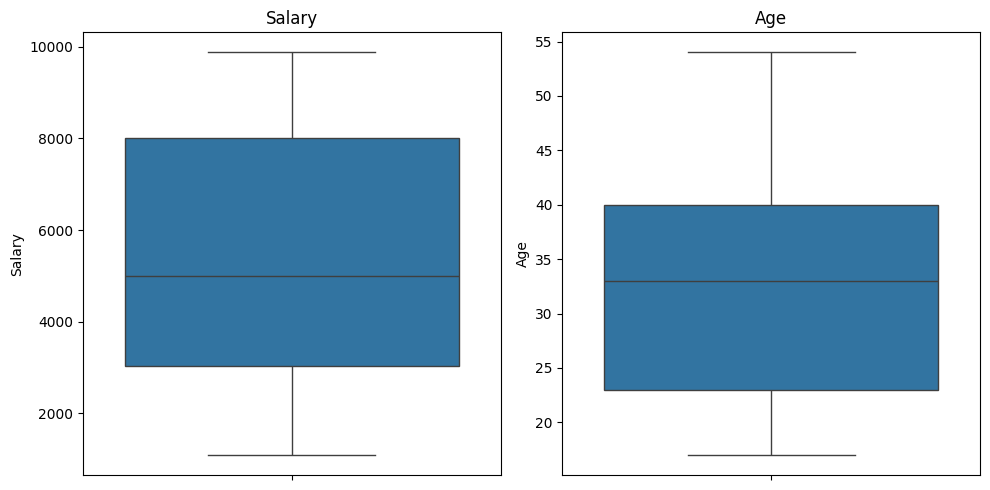

In [443]:
#boxplot to identify outliers
plt.figure(figsize=(10, 5))
# List of numerical column names
num_cols = ['Salary', 'Age']
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y=df1[col])
    plt.title(col)

plt.tight_layout()
plt.show()

From the box plot it is evident that there is no outliers in the numerical columns. We can use mean values to fill the null values in numerical columns.

In [444]:
ms=round(df1['Salary'].mean())
ms

5283

In [445]:
ma=round(df1['Age'].mean())
ma

32

Mean value is found using mean function and rounded to the nearest integer using round function.

In [446]:
df1['Salary']=df1['Salary'].fillna(ms)
df1['Age']=df1['Age'].fillna(ma)
df1

,Company,Age,Salary,Place,Gender
0,TCS,20.0,5283.0,Chennai,M
1,Infosys,30.0,5283.0,Mumbai,M
2,TCS,35.0,2300.0,Calcutta,M
3,Infosys,40.0,3000.0,Delhi,M
4,TCS,23.0,4000.0,Mumbai,M
...,...,...,...,...,...
142,Infosys,22.0,8202.0,Mumbai,M
143,TCS,33.0,9024.0,Calcutta,F
145,Infosys,44.0,4034.0,Delhi,F
146,TCS,33.0,5034.0,Mumbai,F


We've used mean to fill the null values in column Salary and Age

In [447]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  136 non-null    object 
 1   Age      144 non-null    float64
 2   Salary   144 non-null    float64
 3   Place    130 non-null    object 
 4   Gender   144 non-null    object 
dtypes: float64(2), object(3)
memory usage: 6.8+ KB


In [448]:
df1.isnull().sum()

Company     8
Age         0
Salary      0
Place      14
Gender      0
dtype: int64

For categorical column like Company and Place we will be using mode to fill the null values.

In [449]:
df1['Company'].value_counts()

Company
TCS        54
Infosys    45
CTS        37
Name: count, dtype: int64

In [450]:
mc=df1['Company'].mode()
mc

0    TCS
Name: Company, dtype: object

In [451]:
df1['Place'].value_counts()

Place
Mumbai         34
Calcutta       32
Chennai        14
Delhi          14
Cochin         13
Noida           8
Hyderabad       8
Pondicherry     3
Pune            2
Bhopal          1
Nagpur          1
Name: count, dtype: int64

In [452]:
mp=df1['Place'].mode()
mp

0    Mumbai
Name: Place, dtype: object

Mode value is obtained for both the columns using mode function and will be used to fill null values.

In [453]:
df1['Company']=df1['Company'].fillna('TCS')

In [454]:
df1['Place']=df1['Place'].fillna('Mumbai')

Mode value is filled in Company and Place columns in place of null values

In [455]:
df1.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Gender     0
dtype: int64

Null values in every column is eliminated.

In [457]:
df1.reset_index(drop=True, inplace=True)
df1

,Company,Age,Salary,Place,Gender
0,TCS,20.0,5283.0,Chennai,M
1,Infosys,30.0,5283.0,Mumbai,M
2,TCS,35.0,2300.0,Calcutta,M
3,Infosys,40.0,3000.0,Delhi,M
4,TCS,23.0,4000.0,Mumbai,M
...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,M
140,TCS,33.0,9024.0,Calcutta,F
141,Infosys,44.0,4034.0,Delhi,F
142,TCS,33.0,5034.0,Mumbai,F


Row index is corrected so as to match with the shape of the dataframe.

### 2.Data Analysis

Filter the data with age >40 and salary<5000


In [460]:
filter_df=df1[(df1['Age']>40) & (df1['Salary']<5000)]
filter_df

,Company,Age,Salary,Place,Gender
21,Infosys,50.0,3184.0,Delhi,M
32,Infosys,45.0,4034.0,Calcutta,M
39,Infosys,41.0,3000.0,Mumbai,M
50,Infosys,41.0,3000.0,Chennai,M
57,Infosys,51.0,3184.0,Hyderabad,M
68,Infosys,43.0,4034.0,Mumbai,M
75,Infosys,44.0,3000.0,Cochin,M
85,Infosys,41.0,3000.0,Delhi,M
92,Infosys,54.0,3184.0,Mumbai,M
103,Infosys,44.0,4034.0,Delhi,M


Plot the chart with age and salary

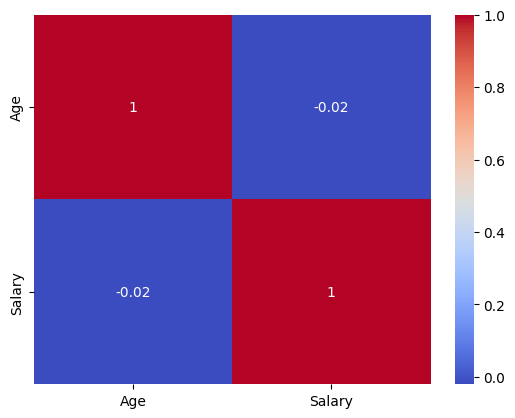

In [461]:
plot_df = df1.drop(['Company', 'Gender', 'Place'], axis='columns')
corr = plot_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

From the heatmap we can conclude there is no linear corretlation between age and salary.

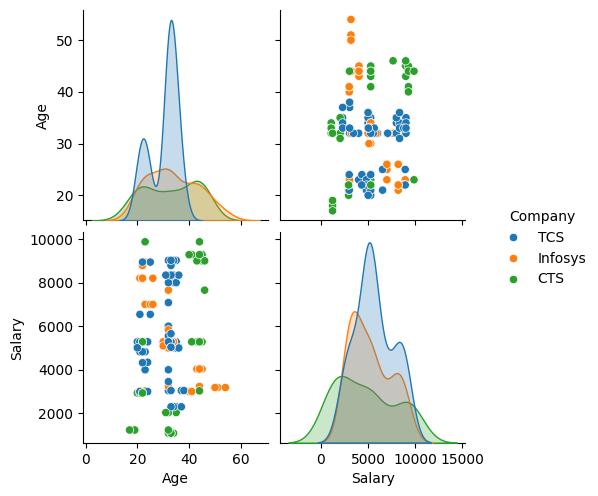

In [464]:
sns.pairplot(df1,hue="Company")
plt.show()

There is no specific relationship opserved from age vs salary scatter plot.

Count the number of people from each place and represent it visually

In [474]:
Countdf=pd.DataFrame({"No_of_Employees":df1.Place.value_counts()}).reset_index()
Countdf.columns = ['Place','No_of_Employees']
Countdf

,Place,No_of_Employees
0,Mumbai,48
1,Calcutta,32
2,Chennai,14
3,Delhi,14
4,Cochin,13
5,Noida,8
6,Hyderabad,8
7,Pondicherry,3
8,Pune,2
9,Bhopal,1


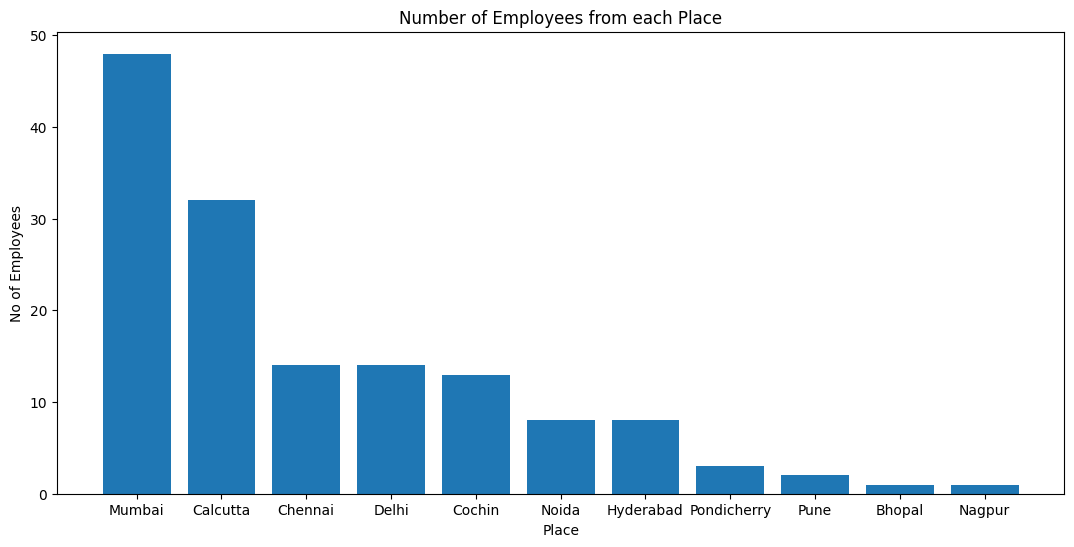

In [475]:
plt.figure(figsize=(13, 6))
plt.bar(Countdf['Place'],Countdf['No_of_Employees'])
plt.title('Number of Employees from each Place')
plt.xlabel('Place')
plt.ylabel('No of Employees')
plt.show()

From the visual it is clear that Mumbai has the highest number of with 48 emplyoyees and Bhopal and Nagpur has the least with 1 employee.

### 3.Data Encoding


In [477]:
df_one_hot_encoded=pd.get_dummies(data=df1,columns = ['Company','Place','Gender'])

df_one_hot_encoded

,Age,Salary,Company_CTS,Company_Infosys,Company_TCS,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Pondicherry,Place_Pune,Gender_F,Gender_M
0,20.0,5283.0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True
1,30.0,5283.0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,35.0,2300.0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True
3,40.0,3000.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
4,23.0,4000.0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,22.0,8202.0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
140,33.0,9024.0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False
141,44.0,4034.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False
142,33.0,5034.0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False


One Hot Encoding is used to encode the categorical columns.

### 4.Feature Scaling

Standard Scaling

In [484]:
scaler = StandardScaler()
scaler.fit(df_one_hot_encoded)
scaled_data_st = scaler.transform(df_one_hot_encoded)
scaled_data_st

array([[-1.46656902e+00, -1.67718000e-04, -5.88042849e-01, ...,
        -1.18678166e-01, -5.34522484e-01,  5.34522484e-01],
       [-2.47954254e-01, -1.67718000e-04, -5.88042849e-01, ...,
        -1.18678166e-01, -5.34522484e-01,  5.34522484e-01],
       [ 3.61353128e-01, -1.26409057e+00, -5.88042849e-01, ...,
        -1.18678166e-01, -5.34522484e-01,  5.34522484e-01],
       ...,
       [ 1.45810642e+00, -5.29379800e-01, -5.88042849e-01, ...,
        -1.18678166e-01,  1.87082869e+00, -1.87082869e+00],
       [ 1.17630175e-01, -1.05671167e-01, -5.88042849e-01, ...,
        -1.18678166e-01,  1.87082869e+00, -1.87082869e+00],
       [-1.22284607e+00,  1.23663778e+00, -5.88042849e-01, ...,
        -1.18678166e-01, -5.34522484e-01,  5.34522484e-01]])

MinMax Scaling

In [485]:
scaler = MinMaxScaler()
scaler.fit(df_one_hot_encoded)
scaled_data_mm = scaler.transform(df_one_hot_encoded)
scaled_data_mm

array([[0.08108108, 0.47729601, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.35135135, 0.47729601, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.48648649, 0.13781723, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.72972973, 0.33515421, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.43243243, 0.44895869, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.13513514, 0.80949129, 0.        , ..., 0.        , 0.        ,
        1.        ]])

Standard Scaling and MinMax Scaling  is used to scale the encoded dataframe.